<a href="https://colab.research.google.com/github/manojpod/MLP_2023_T2/blob/colab/OPPE1/OPPE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preamble: Load the dataset and examine it.

## You have to submit the correct answers you got in the colab file into the exam portal.

## you have to make sure that the code for each question is present below the respected question number


## The answers submitted in the portal should be backed by the code and the output you got in your colab file

### Notes:
* This exam consists of a Regression problem.
* Shape of the dataset is (10000,12) [Note if you are not getting this shape that means your data has not been uploaded correctly to the colab]
* The target feature in the dataset is the '**Sale Price**' column.
* Random state should be taken as 27 wherever applicable.
* ignore all the warnings while executing the codes

# Metadata

1. Year - selling year
1. Date - selling date
1. Locality - locality of the property
1. Estimated Value - estimated selling price of the property
1. Sale Price - Selling price of the property  ▶▶▶ **Target**
1. num_family - Number of family staying in the property
1. Residential - Type of the property
1. num_rooms - Number of rooms
1. carpet_area - The area of an apartment that can be covered by a carpet or the net usable area is known as the carpet area.
1. property_tax_rate - yearly tax of the property($)
1. Face - Direction property is facing
1. Bathroom Count

## Q1. [marks : 1] Which dataset are you using for this exam?

Options:

A) V1

B) V2

C) V3

D) V4

E) V5

Answer: V1: A, V2:B, V3: C, V4:D, V5:E


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# @title Dataset Version {display-mode: "form"}
dataset = "V1" # @param ["V1", "V2", "V3","V4","V5"]
dataset = f'https://raw.githubusercontent.com/manojpod/MLP_2023_T2/main/OPPE1/{dataset}.csv'

In [3]:
df = pd.read_csv(dataset) #dataset csv file uploaded to the session storage
## https://drive.google.com/drive/folders/1O6JrA_nBTo2fQrYVx7lHJdJAZe4tmBTw?usp=sharing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,cross_val_score, cross_validate,KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,OneHotEncoder

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Greenwich,NaN,5187000.0,?,Detached House,3,2,1026.0,1.025953,South
1,2009-01-02,2009,Norwalk,NaN,480000.0,Single Family,Detached House,3,2,1051.0,1.025953,West
2,2009-01-02,2009,Waterbury,57890.0,152000.0,Single Family,Detached House,3,2,943.0,1.025953,East
3,2009-01-02,2009,NaN,44520.0,60000.0,Single Family,Detached House,3,2,1099.0,1.025953,North
4,2009-01-03,2009,Bridgeport,91071.0,250000.0,Two Family,Duplex,4,2,1213.0,1.025953,South


In [ ]:
data = df.copy()

In [ ]:
data.isnull().sum()

Date                    0
Year                    0
Locality             1285
Estimated Value      1281
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1282
property_tax_rate       0
Face                    0
dtype: int64

## Q.2 [Marks: 4] What are the unique values present in the `Locality` feature of the dataset?

A) [Detached House, Duplex, Triplex, Fourplex]

B) [Bridgeport, Fairfield, Greenwich, Norwalk,Stamford,Waterbury, West Hartford]

C) [Boston, California, Greenwich, Stamford]

D) [West Hartford, Waterbury, Norwalk]

Answer: V1,V2, V3, V4, V5: **option B**

In [ ]:
data["Locality"].dropna().unique()

array(['Greenwich', 'Norwalk', 'Waterbury', 'Bridgeport', 'Fairfield',
       'West Hartford', 'Stamford'], dtype=object)

## Q.3 [Marks: 4] Which of the following columns have categorical data?[MSQ]

A) Estimated Value

B) Locality

C) Property

D) num_bathrooms

E) Face

Answer V1,V2,V3, V4, V5 : **Option B,C,E**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8715 non-null   object 
 3   Estimated Value    8719 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [ ]:
numCols = list(data.select_dtypes("number").columns)
catCols = list(data.select_dtypes(exclude = "number").columns)
catCols

['Date', 'Locality', 'Property', 'Residential', 'Face']

## Q4 [marks: 4] Which of the following features have `missing`(NaN) or unknown ("?") values present in the dataset?[MSQ]

Options:

A) Year

B) Estimated Value

C) Sale Price

D) Locality

E) Property

F) property_tax_rate       

Answer: V1,V2, V3, V4, V5 : **option B,D,E**


In [ ]:
data.isin(values=['?',np.nan]).sum()

Date                    0
Year                    0
Locality             1285
Estimated Value      1281
Sale Price              0
Property             1873
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1282
property_tax_rate       0
Face                    0
dtype: int64

##Q5[marks:4] In the **Year** 2022, how many houses (rows) located in the Greenwich **Locality** have more than 3 **num_room**, and **facing** towards either the North or East? [NAT]

- V1: 2
- V2: 4
- V3: 4
- V4: 6
- V5: 3

In [ ]:
data[(data['Year']==2022)&(data['Locality'] == 'Greenwich')&(data['num_rooms']>3)&(data['Face'].isin(['North','East']))].shape[0]

2

In [ ]:
data[data['Year']==2022] [data['Locality'] == 'Greenwich'] [data['num_rooms']>3] [data['Face'].isin(['North','East'])].shape[0]

<ipython-input-188-05f7b2fb7db1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Year']==2022] [df['Locality'] == 'Greenwich'] [df['num_rooms']>3] [df['Face'].isin(['North','East'])].shape[0]


2

In [ ]:
data.query('Year== 2022 and Locality=="Greenwich" and num_rooms>3 and (Face=="North" or Face=="East")').shape[0]

# Q6 [Marks: 4] [NAT] Split the dataset into train dataset and test dataset in the following manner
  * data(rows) collected before the year of 2021 [2009-2020] should be the train dataset
  * data(rows) collected in the year of 2021 and 2022 (both inclusive) should be the test dataset
  * columns except of the label vector should be the feature matrix (X_train or X_test)
  * make label vector (Y_train or y_test) containing values only from the target feature.   

# How many rows are in the feature matrix of the test dataset ?

Ans:

- V1 : 1728
- V2 : 1739
- V3 : 1735
- V4 : 1671
- V5 : 1718


In [ ]:
data_train = data[pd.to_datetime(data['Date']).dt.year < 2021]
data_test = data[pd.to_datetime(data['Date']).dt.year > 2020]

In [ ]:
data_train.shape[0], data_test.shape[0]

(8272, 1728)

In [ ]:
data[data['Year']<2021].shape[0], data[data['Year']>2020].shape[0]

(8272, 1728)

In [ ]:
data_X_train = data_train.drop(columns = 'Sale Price', axis=1)
data_X_test = data_test.drop(columns = 'Sale Price', axis=1)

In [ ]:
y_train = data_train['Sale Price']
y_test = data_test['Sale Price']

In [ ]:
data_X_train.shape, data_X_test.shape

((8272, 11), (1728, 11))

# Rules for Imputing the missing(NaN) or unknown ("?") values:
  - compute the instructed statistical values for different columns in train dataset only to repalce missing(NaN) and unknown("?") values respectively.
  - Replace the missing(NaN) and unknown("?") values from the train and test dataset with the instructed statistical values computed using the train dataset only.
  - Ignore the missing and unknown values while calculating the statistical values.


* Replace missing values(NaN) with the MOST FREQUENT value of the **Locality** feature
* Repalce missing values(NaN) with the MEDIAN value of the **Estimated Value** feature
* Replace missing values(NaN) with the MEAN value of the **carpet_area** feature
* Replace Unknown values("?") with the MOST FREQUENT value of the **Property**.

- Write the answers related to the above imputation in below questions respectively.


In [ ]:
transformer_list = [
    ('mean', SimpleImputer(missing_values=np.nan,strategy= 'mean'), ['carpet_area']),
    ('median',SimpleImputer(missing_values=np.nan,strategy= 'median'),['Estimated Value']),
    ('most_freq',SimpleImputer(missing_values=np.nan,strategy= 'most_frequent'), ['Locality']),
    ('most_freq_2',SimpleImputer(missing_values="?",strategy= 'most_frequent', ), ['Property'])
]

ct = ColumnTransformer(transformers = transformer_list, remainder='passthrough',verbose_feature_names_out=False)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean', SimpleImputer(), ['carpet_area']),
                                ('median', SimpleImputer(strategy='median'),
                                 ['Estimated Value']),
                                ('most_freq',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Locality']),
                                ('most_freq_2',
                                 SimpleImputer(missing_values='?',
                                               strategy='most_frequent'),
                                 ['Property'])],
                  verbose_feature_names_out=False)

In [ ]:
X_train_clean = pd.DataFrame(ct.fit_transform(data_X_train),columns = ct.get_feature_names_out())

In [ ]:
X_test_clean = pd.DataFrame(ct.transform(data_X_test),columns = ct.get_feature_names_out())

In [ ]:
X_train_clean[:1]

,carpet_area,Estimated Value,Locality,Property,Date,Year,Residential,num_rooms,num_bathrooms,property_tax_rate,Face
0,1026.0,230360.0,Greenwich,Single Family,2009-01-02,2009,Detached House,3,2,1.025953,South


In [ ]:
X_test_clean[:1]

,carpet_area,Estimated Value,Locality,Property,Date,Year,Residential,num_rooms,num_bathrooms,property_tax_rate,Face
0,960.0,230360.0,Stamford,Single Family,2021-01-02,2021,Detached House,3,1,1.023495,North


##Q7 [Marks: 4] Write the MEAN value of the **carpet_area** column of the train dataset you found to replace all the Missing Values (NaN). [NAT] (upto 2 digits after decimal points)

- V1: **1113.4** (Range: 1102.27, 1124.54)
- V2: **1106.92** (Range: 1095.85, 1117.99)
- V3: **1110.92** (Range: 1099.81, 1122.03)
- V4: **1106.88** (Range: 1095.81, 1117.95)
- V5: **1114.54** (Range: 1103.39, 1125.68)

In [ ]:
data_X_train["carpet_area"].mean()

1113.4033508723346

In [ ]:
ct.transformers_[0][1].statistics_[0]

1113.4033508723346

##Q8 [Marks: 4] Write the value you used to replace the unknown value ("?") in the **Property**  column of the train dataset [MCQ]

A) Single Family

B) Two Family

C) Three Family

D) Four Family

Ans:

V1,V2,V3,V4 : A) Single Family


In [ ]:
data_X_train["Property"].mode().values

array(['Single Family'], dtype=object)

In [ ]:
ct.transformers_[3][1].statistics_[0]

'Single Family'

# Apply preprocessing on features of train and test datasets.

- Drop the 'Date' Column before the preprocessing steps.
- before applying any preprocessing there should not be any missing or unknown values present in the train and test dataset.
- fitting (learning) should be done only on train dataset.
- transform the train and test dataset using the fitting (learning) of train dataset

## For Numerical Features

* Scale the numerical feature of the feature matrix using the Min-Max Scaler

## For Categorical Features

* One-Hot Encode all categorical features(object columns) in the feature matrix

## Q9 [Marks:10] How many total features you got after one-hot encoding and scaling the training dataset? [MCQ]

[Options]

A) 10

B) 12

C) 25

D) 28

Ans : **C) 25** (all versions)

In [ ]:
X_train_clean = X_train_clean.drop('Date', axis=1)
X_test_clean = X_test_clean.drop('Date', axis=1)

In [ ]:
X_train_clean[:1]

,carpet_area,Estimated Value,Locality,Property,Year,Residential,num_rooms,num_bathrooms,property_tax_rate,Face
0,1026.0,230360.0,Greenwich,Single Family,2009,Detached House,3,2,1.025953,South


In [ ]:
X_train_clean.isin([np.nan,"?"]).sum()

carpet_area          0
Estimated Value      0
Locality             0
Property             0
Year                 0
Residential          0
num_rooms            0
num_bathrooms        0
property_tax_rate    0
Face                 0
dtype: int64

In [ ]:
data_train.select_dtypes(exclude = "number").columns

Index(['Date', 'Locality', 'Property', 'Residential', 'Face'], dtype='object')

In [ ]:
data_train.select_dtypes("number").columns

Index(['Year', 'Estimated Value', 'Sale Price', 'num_rooms', 'num_bathrooms',
       'carpet_area', 'property_tax_rate'],
      dtype='object')

In [ ]:
trf = [
    ("OHE",OneHotEncoder(),['Locality', 'Property', 'Residential', 'Face']),
    ('scaler', MinMaxScaler(), ['Year', 'Estimated Value', 'num_rooms', 'num_bathrooms','carpet_area', 'property_tax_rate'])
]

ct2 = ColumnTransformer(trf, remainder='passthrough')

ct2

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(),
                                 ['Locality', 'Property', 'Residential',
                                  'Face']),
                                ('scaler', MinMaxScaler(),
                                 ['Year', 'Estimated Value', 'num_rooms',
                                  'num_bathrooms', 'carpet_area',
                                  'property_tax_rate'])])

In [ ]:
X_train_clean.head()

,carpet_area,Estimated Value,Locality,Property,Year,Residential,num_rooms,num_bathrooms,property_tax_rate,Face
0,1026.0,230360.0,Greenwich,Single Family,2009,Detached House,3,2,1.025953,South
1,1051.0,230360.0,Norwalk,Single Family,2009,Detached House,3,2,1.025953,West
2,943.0,57890.0,Waterbury,Single Family,2009,Detached House,3,2,1.025953,East
3,1099.0,44520.0,Bridgeport,Single Family,2009,Detached House,3,2,1.025953,North
4,1213.0,91071.0,Bridgeport,Two Family,2009,Duplex,4,2,1.025953,South


In [ ]:
X_train = ct2.fit_transform(X_train_clean)
X_test = ct2.transform(X_test_clean)

X_train.shape, X_test.shape

((8272, 25), (1728, 25))

In [ ]:
X_train[:1]

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.01354797, 0.        , 0.14285714, 0.06031594, 0.01398097]])

# Hence forth you will only use cleaned and preprocessed train and test dataset.  

## Q10 [Marks: 4] Apply `LinearRegression` on the train dataset(`X_train` and `y_train`). What is the `R2 score` on the test dataset(`X_test` and `y_test`). ( Upto 4 digits after decimal points) [NAT]

ANS:

V1: 0.6484 (Range: 0.6289, 0.6678)

V2: 0.0988 (Range: 0.0959, 0.1018)

V3: 0.7887 (Range: 0.7651, 0.8124)

V4: 0.705 (Range: 0.6839, 0.7262)

V5: 0.7812 (Range: 0.75, 0.8125)


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)

0.6483666331912852

## Q11 [Marks: 6]Enter the maximum value of `𝑅2 score` you got using the `LinearRegression` model when computed with 5 folds from the training dataset (X_train and y_train) using `cross_val_score`. ( Upto 4 digits after decimal points) obtained.[NAT]

(Hint: By default cross_val_score uses LinearRegression's scoring metric, which is  𝑅2 score.)

Ans:

- V1: 0.8156 (Range: 0.7911, 0.84)
- V2: 0.8511 (Range: 0.8171, 0.8852)
- V3: 0.7926 (Range: 0.7689, 0.8164)
- V4: 0.8144 (Range: 0.7818, 0.847)
- V5: 0.8186 (Range: 0.7858, 0.8513)



In [ ]:
cvs = cross_val_score(estimator= LinearRegression(),X= X_train, y= y_train, cv= 5)

In [ ]:
np.max(cvs)

0.8155653167417878

##Q12[Marks:6] Train Ridge and Lasso with random_state=27 and keep other parameters as default using train dataset. Which one has the least "mean squared error" for the test dataset.

A) Ridge

B) Lasso

C) Both are Equal


- V1: A) Ridge
- V2: B) Lasso
- V3: B) Lasso
- V4: B) Lasso
- V5: A) Ridge

In [ ]:
ridge = Ridge(random_state=27)
ridge.fit(X_train, y_train)

lasso = Lasso(random_state = 27)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.076e+14, tolerance: 1.091e+12
  model = cd_fast.enet_coordinate_descent(


Lasso(random_state=27)

In [ ]:
if (mean_squared_error(y_test, lasso.predict(X_test)) > mean_squared_error(y_test, ridge.predict(X_test))):
  print("Ridge")
else:
  print("Lasso")

Ridge


##Q13: [Marks: 6] Train the `SGDRegressor(random_state=27,warm_start=True)` with maximum passes over the train dataset can be 100.

Write the correct R2 score for this estimator on test dataset  [NAT] (correct Upto 4 digits)

Ans:

- V1: 0.5268 (Range: 0.511, 0.5426)
- V2: 0.0629 (Range: 0.061, 0.0648)
- V3: 0.5675 (Range: 0.5505, 0.5845)
- V4: 0.6157 (Range: 0.5911, 0.6403)
- V5: 0.5881 (Range: 0.5646, 0.6116)


In [ ]:
sgd = SGDRegressor(random_state=27,max_iter=100,warm_start=True)
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.5267937468412169

# (Common Instructions for Question 14 and 15)

- create a pipeline of the PolynomialFeatures(interaction_only=True) as transformer and Lasso as an estimator.

- Use GridSearchCV for tuning the hyperparameters of the created pipeline on training dataset.

1. Keep polynomial degree as : [1,2]
2. lasso alpha value to be taken as : [10,100,1000,10000]
3. scoring : neg_mean_absolute_error.
4. cv = 5
5. n_jobs = -1 (negative one) [it helps in using all the computational power to run this job]

(Note: Kindly ignore the warning.)

## Q14 [Marks: 6] Mark the best `alpha` value you got using above instructions.[MCQ]

A) 10

B) 100

C) 1000

D) 10000


Ans: c) 1000 (all versions)

## Q15 [Marks: 6] Enter the best polynomial degree value you got using above instructions.[NAT]

Ans: 1 (all versions)

In [ ]:
grid_pipeline = Pipeline([
    ("poly", PolynomialFeatures(interaction_only=True)),
    ("Lasso", Lasso(warm_start=True))
    ])

param_grid = {'poly__degree': (1,2),
              'Lasso__alpha': (10,100,1000,10000)}

In [ ]:
lasso_gridsearch = GridSearchCV(estimator= grid_pipeline,
                                param_grid = param_grid,
                                scoring = "neg_mean_absolute_error",
                                return_train_score=False,
                                cv = 5,
                                n_jobs = -1,
                                verbose= 1 )
lasso_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('Lasso', Lasso(warm_start=True))]),
             n_jobs=-1,
             param_grid={'Lasso__alpha': (10, 100, 1000, 10000),
                         'poly__degree': (1, 2)},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
lasso_gridsearch.best_params_

{'Lasso__alpha': 1000, 'poly__degree': 1}

# (Common Instructions for Question 16 and 17)
## To Reduce number of dimensions of training data with PCA. Fit the PCA model using following parameter values on training data.

* n_components= 13
* svd_solver='full'
* whiten=True
* random_state=27

## Q16: [Marks:6] What is the sum of `explained_variance_ratio_` ? [NAT] (upto two digits after the decimal)

Ans: 0.97 (Range: 0.94, 1.0) [all versions]


In [ ]:
pca = PCA(n_components=13,whiten=True,svd_solver='full', random_state=27)
X_train_PCA = pca.fit_transform(X_train)

In [ ]:
pca.explained_variance_ratio_.sum()

0.9704054622920404

In [ ]:
X_train_PCA[:1]

array([[-0.55683232, -0.67235758,  1.46201278, -0.52692309, -0.55185412,
        -1.28112806, -0.37112902,  0.50145881, -0.63257712, -1.81505603,
        -1.95660932, -0.46038493, -0.92426504]])

In [ ]:
# Create a new dataset from principal components
pca_data = pd.DataFrame(X_train_PCA, columns = [f"PC{num+1}" for num in range(len(X_train_PCA[0]))]) #
pca_data['target'] = y_train
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,-0.556832,-0.672358,1.462013,-0.526923,-0.551854,-1.281128,-0.371129,0.501459,-0.632577,-1.815056,-1.956609,-0.460385,-0.924265,5187000.0
1,-0.516444,-0.667429,-0.145676,1.651498,0.256716,-1.225412,-0.476198,0.407773,-0.550671,-0.838342,2.209804,-1.282502,-1.286870,480000.0
2,-0.420106,1.610505,0.477590,0.138500,0.845738,-1.406935,0.939558,-2.068915,0.013234,-0.017387,-0.106759,0.062055,-1.011237,152000.0
3,0.049285,-0.325545,-1.795673,-0.895733,-1.244671,-1.117242,0.276035,-0.486353,-0.037702,0.011097,-0.067585,0.030246,-1.217754,60000.0
4,2.564129,-0.430164,1.192383,-0.614371,-1.276964,-0.744651,-2.172964,-0.850698,0.006141,0.124292,-0.195361,-0.049645,-1.309386,250000.0


In [ ]:
pca.explained_variance_ratio_

array([0.17593528, 0.10229786, 0.10113922, 0.10054125, 0.09173088,
       0.0825141 , 0.06277781, 0.04926338, 0.04607906, 0.04400039,
       0.0424835 , 0.04054112, 0.03110159])

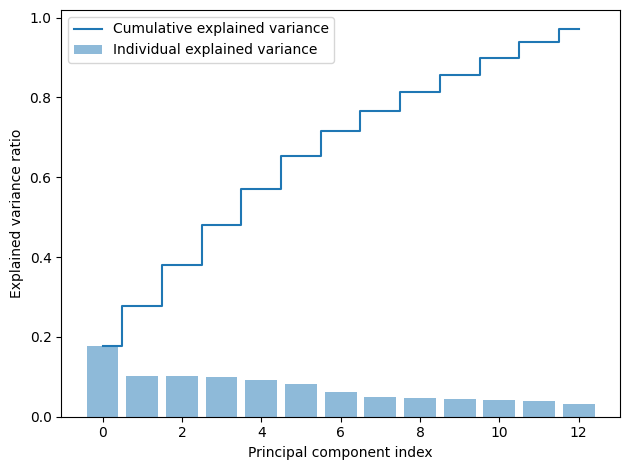

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Q17: [Marks: 6] Use PCA transformed training feature matrix from earlier question and training labels to fit the `RidgeCV` estimator with cv=5 and having alpha values as [0.1,1,10,100,1000,10000]. Calculate the R2 score you got from the model for PCA transformed test dataset. [NAT] (upto 4 digits after the decimal)

**Ans:**
- V1: 0.2964 (Range: 0.2845, 0.3082)
- V2: 0.0185 (Range: 0.0177, 0.0192)
- V3: 0.3979 (Range: 0.382, 0.4138)
- V4: 0.3171 (Range: 0.3044, 0.3298)
- V5: V5: 0.3546 (Range: 0.3404, 0.3688)


In [ ]:
ridgecv = RidgeCV(alphas=[0.1,1,10,100,1000,10000],
                  cv = 5,
                  )
ridgecv.fit(X_train_PCA, y_train)

RidgeCV(alphas=[0.1, 1, 10, 100, 1000, 10000], cv=5)

In [ ]:
ridgecv.alpha_

1000.0

In [ ]:
ridgecv.score(X_train_PCA, y_train)

0.31193880313980127

In [ ]:
X_test_pca =  pca.transform(X_test)

In [ ]:
ridgecv.score(X_test_pca,y_test)

0.2963684940402008

# (Common Instructions for Question 18-20)
Construct a pipeline to apply following steps
* STEP-1 Selecting 10 best features based on the f_regression score function.
* STEP-2 Apply Lasso algorithm with random_state=27 on that  


##Q18[Marks: 5] What is the max P-VALUE you got for any feature of the train dataset? [NAT] (upto 4 digits after the decimal)

- V1: 0.84 (Range: 0.82, 0.87)
- V2: 0.83 (Range: 0.81, 0.85)
- V3: 0.75 (Range: 0.73, 0.77)
- V4: 0.77 (Range: 0.74, 0.79)
- V5: 0.73 (Range: 0.71, 0.75)

In [ ]:
steps = [("select_10_best", SelectKBest(score_func=f_regression, k=10)),
         ("lasso",Lasso(random_state=27))]
select_pipe = Pipeline(steps = steps)
select_pipe.fit(X_train,y_train)

select_pipe[0].pvalues_.max()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.876e+14, tolerance: 1.091e+12
  model = cd_fast.enet_coordinate_descent(


0.841406848285681

##Q19[Marks: 5] What is the max F_STATISTICS score you got for any feature of the train dataset? [NAT] (upto 2 digits after the decimal)

- V1: 21322.29 (Range: 20682.62, 21961.96)
- V2: 31340.73 (Range: 30400.51, 32280.95)
- V3: 21658.08 (Range: 21008.34, 22307.83)
- V4: 18398.58 (Range: 17846.62, 18950.54)
- V5: 17496.23 (Range: 16971.35, 18021.12)


In [ ]:
select_pipe[0].scores_.max()

21322.291974023916

In [ ]:
import pandas as pd
terminator_df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})
terminator_df.set_index('first_name', inplace=True)

buckaroo_df = pd.DataFrame({
  'first_name': ['John', 'John', 'Buckaroo'],
  'last_name': ['Parker', 'Whorfin', 'Banzai'],
})
buckaroo_df.set_index('first_name', inplace=True)

terminator_df[~terminator_df.index.isin(buckaroo_df.index)]

,last_name
first_name,
Sarah,Connor
Kyle,Reese


## Q20[Marks: 5] What is the R2 score you got for this model using test dataset? [NAT] (upto 4 digits after the decimal)

- V1: 0.652 (Range: 0.6325, 0.6716)
- V2: 0.0989 (Range: 0.096, 0.1019)
- V3: 0.7872 (Range: 0.7635, 0.8108)
- V4: 0.7058 (Range: 0.6846, 0.727)
- V5: 0.7845 (Range: 0.7609, 0.808)

In [ ]:
select_pipe.score(X_test,y_test)

0.6520323439571941